## Linear Algebra

*By:* **Rabindra Nepal** 


In [1]:
# dependencies

import math
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Distances and Norms

In [2]:
# 1.1
# cosine similarity

def cosine_similarity(a, b):
    ''' a and b are arrays of same shape/size'''
    
    # let us confirm first that a and b have same size
    assert a.shape == b.shape

    # magnitudes of each vector
    mag_a, mag_b = norm(a), norm(b)
    
    if mag_a == 0 or mag_b == 0:
        raise ValueError('At least one of the vectors has magnitude zero.')
 
    return np.dot(a, b)/(norm(a) * norm(b))

1.2

a) **Cosine Similarity:**
It measures the similarity between two non-zero vectors in an inner product space measuring the cosine of angle between those two vectors. The dot product of two vectors is the projection of one vector to another, therefore, the cosine similarity measures the closeness of two vectors.

b)
Since $\cos(\theta) \in [-1, 1]$, similarity score of 0 implies that two vectors perpendicular to each other i.e. most disimilar vectors.

c)
Similarity score of 1 means that the two vectors are exactly same whereas the score of -1 means they are exactly opposite.

In [3]:
# 1.3
# a.

x1 = np.array([4, -3])
x2 = np.array([8, -6])
x3 = np.array([-3, -4])

In [4]:
# b.

cosine_similarity(x1, x2)

1.0

In [5]:
# cos \theta = 1 => x1 and x2 are collinear

In [6]:
# c.

cosine_similarity(x1, x3)

0.0

In [7]:
# cos \theta = 0 => x1 and x3 are orthogonal

In [8]:
# d.

# random x4
x4 = np.random.randint(low=-10, high=10, size=2)
x4

array([-10,   4])

In [9]:
# 1.4

cosx1x2 = cosine_similarity(x1, x2)
print('Cosine similarity of %s and %s is %d.' % (x1, x2, cosx1x2))

Cosine similarity of [ 4 -3] and [ 8 -6] is 1.


In [10]:
cosx1x3 = cosine_similarity(x1, x3)
print('Cosine similarity of %s and %s is %d.' % (x1, x3, cosx1x3))

Cosine similarity of [ 4 -3] and [-3 -4] is 0.


In [11]:
cosx1x4 = cosine_similarity(x1, x4)
print('Cosine similarity of %s and %s is %d.' % (x1, x4, cosx1x4))

Cosine similarity of [ 4 -3] and [-10   4] is 0.


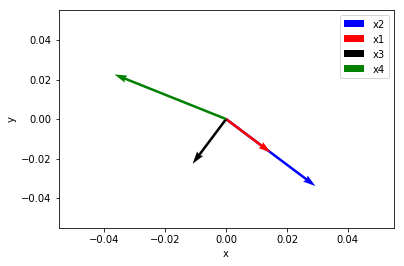

In [12]:
# 1.5
# plotting the all four vectors on xy-plane
plt.figure(figsize=(6, 4))
plt.quiver(x2[0], x2[1], scale=30, color='blue', label='x2')
plt.quiver(x1[0], x1[1], scale=30, color='red', label='x1')
plt.quiver(x3[0], x3[1], scale=30, color='black', label='x3')
plt.quiver(x4[0], x4[1], scale=30, color='green', label='x4')
plt.legend()
plt.xlabel('x')
plt.ylabel('y');

As shown in figure above, vectors x1 and x2 are collinear and x1 and x3 are orthogonal to each other.

In [13]:
# 1.6

# for x4
# L1 norm

print('L1 norm of x4: ', np.linalg.norm(x4, ord=1))

print('L2 norm of x4: ', np.linalg.norm(x4, ord=2))

print('L4 norm of x4: ', np.linalg.norm(x4, ord=4))

print('L10 norm of x4: ', np.linalg.norm(x4, ord=10))

L1 norm of x4:  14.0
L2 norm of x4:  10.770329614269007
L4 norm of x4:  10.063394616598183
L10 norm of x4:  10.000104852652527


In [14]:
# 1.7
# distance for ord=n

def manhattan_distance(a, b):
    
    assert a.shape == b.shape
    
    distance = 0
    for i in range(len(a)):
        distance += abs(a[i] - b[i])
    return distance

def euclidean_distance(a, b):
    
    assert a.shape == b.shape
    
    distance = 0
    for i in range(len(a)):
        distance += (a[i] - b[i])**2.0
    return distance**(1./2)

def l4_distance(a, b):
    
    assert a.shape == b.shape
    
    distance = 0
    for i in range(len(a)):
        distance += (a[i] - b[i])**4.0
    return distance**(1./4)

def l10_distance(a, b):
    
    assert a.shape == b.shape
    
    distance = 0.0
    for i in range(len(a)):
        distance += (a[i] - b[i])**10.0
    return distance**(1.0/10)

def l20_distance(a, b):
    
    assert a.shape == b.shape
    
    distance = 0.0
    for i in range(len(a)):
        distance += (a[i] - b[i])**20.0
    return distance**(1.0/20)

In [15]:
dist = manhattan_distance(x1, x4)
print('Manhattan distance between x1 and x4 is %d.' % dist)

Manhattan distance between x1 and x4 is 21.


In [16]:
dist = euclidean_distance(x1, x4)
print('Euclidean distance between x1 and x4 is %d.' % dist)

Euclidean distance between x1 and x4 is 15.


In [17]:
dist = l4_distance(x1, x4)
print('L4 distance between x1 and x4 is %d.' % dist)

L4 distance between x1 and x4 is 14.


In [18]:
dist = l10_distance(x1, x4)
print('L10 distance between x1 and x4 is %f.' % dist)

L10 distance between x1 and x4 is 14.001367.


In [19]:
dist = l20_distance(x1, x4)
print('L10 distance between x1 and x4 is %f.' % dist)

L10 distance between x1 and x4 is 14.000001.


## 2. Rank, Matrix Inverses and Solving Linear Systems

In [20]:
# 2.1

# setting random seed
seed = 402
np.random.seed(seed=seed)

# required matrix Mat
Mat = 10 - 20 * np.random.random((3,3)) 


# a.
print('Matrix Mat is: \n', Mat)
print('='*20)
# b.
print('rank of Mat is ', np.linalg.matrix_rank(Mat))

Matrix Mat is: 
 [[ 8.98284725  0.46598279  3.76715685]
 [-8.03269592  0.09947017  0.03530441]
 [-8.23689424 -9.13449309  3.09868078]]
rank of Mat is  3


**2.2**

Rank: the number of the linearly independent rows of a matrix.

* If the rank of a square matrix (n $\times$ n) is less than n, then the matrix does not have an inverse of it. 


In [21]:
# 2.3
# inverse of Mat

newMatInverse = np.linalg.inv(Mat)
print('inverse of newMat: \n', newMatInverse)

inverse of newMat: 
 [[ 0.00212627 -0.12087492 -0.0012078 ]
 [ 0.08293177  0.1984454  -0.10308353]
 [ 0.25012371  0.2636813   0.01563106]]


In [22]:
# 2.4

b = np.array([1, 2, 3])
x = np.matmul(np.linalg.inv(Mat), b)

# 2.4.a
print('x: \n', x)

x: 
 [-0.24324697  0.17057196  0.82437947]


In [23]:
# 2.4.b

ans = np.matmul(Mat, x)
print('Mat * x: ', ans)

Mat * x:  [1. 2. 3.]


In [24]:
# 2. 5
# Using numpy.linalg.solve function:

x = np.linalg.solve(Mat, b)

# 2.5.a.
print('x: ', x)

# 2.5.b - Okay

x:  [-0.24324697  0.17057196  0.82437947]


In [25]:
# 2.6

newMat = np.array([[1, -1, 1], [-3, 2, 4], [-1, 0, 6]])

# 2.6.a
print('newMat: \n', newMat)

newMat: 
 [[ 1 -1  1]
 [-3  2  4]
 [-1  0  6]]


In [26]:
# 2.6.b

newMatInverse = np.linalg.inv(newMat)
print('Inverse of newMat: \n', newMatInverse)
print('='*20)
print('rank of newMat: ', np.linalg.matrix_rank(newMat))

Inverse of newMat: 
 [[-6.23575333e+15 -3.11787667e+15  3.11787667e+15]
 [-7.27504555e+15 -3.63752278e+15  3.63752278e+15]
 [-1.03929222e+15 -5.19646111e+14  5.19646111e+14]]
rank of newMat:  2


In [27]:
# 2.6.c
print('newMat * newMatInverse: \n', newMat * newMatInverse)

newMat * newMatInverse: 
 [[-6.23575333e+15  3.11787667e+15  3.11787667e+15]
 [ 2.18251367e+16 -7.27504555e+15  1.45500911e+16]
 [ 1.03929222e+15 -0.00000000e+00  3.11787667e+15]]


In [28]:
# 2.6.d

b = np.array([1, 2, 3])
x = np.linalg.solve(newMat, b)
print('x: ', x)

x:  [-3.11787667e+15 -3.63752278e+15 -5.19646111e+14]


*(2.6.e).*  Clearly, the solution for x shows that there is something wrong. But we did not get any error using the numpy functions. This is due to the floating point values which is leading a zero to a very small number of ~ 1e-15 or so. Due to which, the numpy functions did not show any errors and gave the answers but they are clearly meaningless and wrong. 


This is dangerous and we need to be very careful in using these functions while writing Machine Learning algorithms. We can probably write some checks to avoid the situations like this. 

In [29]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
# 2.7

x, r, rank, s = np.linalg.lstsq(newMat, b)

# 2.7.a.
print('solution for x: \n', x)

solution for x: 
 [ 0.03100775 -0.10271318  0.53294574]


In [31]:
# rank of newMat given above
rank

2

In [32]:
# 2.7.b.
b_hat = np.matmul(newMat, x)
print('b_hat = newMat * solution: \n', b_hat)

b_hat = newMat * solution: 
 [0.66666667 1.83333333 3.16666667]


In [33]:
# 2.7.c
# Euclidean distance betwee b and b_hat
distance = math.sqrt(np.sum([(b[i] - b_hat[i])**2 for i in range(len(b))]))
print('Euclidean distance between b and b_hat: \n', distance)

Euclidean distance between b and b_hat: 
 0.408248290463863


## 3. Determinants, Eigenvalues, and Positive Definite Matrices

In [34]:
# 3.1

# setting seed for random numbers
seed = 88
np.random.seed(seed=seed)

Mat2 = np.random.normal(5, math.sqrt(10), size=(3,3))
print('Mat2: \n', Mat2)

Mat2: 
 [[ 5.33799785 11.97540026  8.02491684]
 [ 5.21633489  8.37893737  8.15336839]
 [ 2.05418684  7.30982403  4.45857477]]


In [35]:
# 3.2

det_Mat2 = np.linalg.det(Mat2)
print('Determinant of Mat2: ', det_Mat2)

Determinant of Mat2:  -28.801935084011454


*(3.3).* If a matrix represents a linear transformation, then the determinant of that matrix corresponds to the magnitude of volume magnification of the region before and after the transformation by the matrix. So if the transformation matrix is 2I: after this linear transformation the volume of the region is increased by 4 as the det(2I) = 4. 

The negative value of the determinant suggests that the transformation corresponding to that matrix will lead to the decrease in the volume of the region after the transformation by the matrix.

In [36]:
# 3.4
eig_values, eig_vectors = np.linalg.eig(Mat2)
print('Eigenvalues of Mat2 are: \n', eig_values)
print('='*20)
print('Eigenvectors of Mat2 are: \n', eig_vectors)

Eigenvalues of Mat2 are: 
 [19.75530817  0.65297116 -2.23276935]
Eigenvectors of Mat2 are: 
 [[-0.70696977 -0.8022028   0.42320826]
 [-0.59649451 -0.08242487 -0.67359825]
 [-0.37998426  0.59133477  0.60593743]]


*(3.5).* For a matrix, which represents a transformation map, the eigenvectors represent the directions along which the transformation matrix will map to. And the corresponding eigenvalues suggest that the transformation along the direction of eigenvector is magnified by the value of eigenvalue. For example, if a matrix has eigenvectors [1, -1] and [-1, 1] and eigenvalues 1 and -1, this means that the matrix transforms a system/matrix when acted on along the direction of [1, -1] by the multiple of magnitude of 1 and along the direction [-1, 1] by the magnification of -1 respectively.

If eigenvalue of a matrix is 0, then the matrix will have zero determinant and hence will not be invertible i.e. the inverse of the matrix does not exist.